# DBSCAN Clustering with Long Data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the data
file_path = "../data/nhanes_1720.csv"
data = pd.read_csv(file_path)
data

,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL
0,5.0,0.0,10.0,5.0,10.0,5.0,15.0,5.0,0.0,-5.0,5.0,0.0,5.0,15.0
1,15.0,10.0,10.0,5.0,0.0,15.0,-5.0,10.0,15.0,5.0,5.0,5.0,0.0,0.0
2,20.0,25.0,5.0,5.0,10.0,10.0,10.0,25.0,20.0,5.0,5.0,10.0,10.0,20.0
3,5.0,0.0,0.0,5.0,0.0,10.0,15.0,5.0,5.0,-5.0,5.0,-5.0,0.0,15.0
4,5.0,0.0,10.0,10.0,15.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,888.0,5.0,5.0,888.0,0.0,888.0,0.0,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
5143,25.0,30.0,40.0,35.0,55.0,70.0,666.0,20.0,40.0,45.0,45.0,60.0,85.0,666.0
5144,30.0,20.0,5.0,25.0,15.0,30.0,45.0,35.0,30.0,15.0,30.0,25.0,55.0,60.0
5145,888.0,5.0,5.0,888.0,0.0,888.0,30.0,888.0,5.0,10.0,888.0,10.0,888.0,15.0


In [3]:
# Select the columns for right ear measurements

right_ear_columns = ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
right_ear_data = data[right_ear_columns]
right_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Select the columns for left ear measurements

left_ear_columns = ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
left_ear_data = data[left_ear_columns]
left_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Concatenate the right and left ear data

ear_data = pd.concat([right_ear_data, left_ear_data], axis=0)

# Change the column names to be more descriptive

ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
0,5.0,0.0,10.0,5.0,10.0,5.0,15.0
1,15.0,10.0,10.0,5.0,0.0,15.0,-5.0
2,20.0,25.0,5.0,5.0,10.0,10.0,10.0
3,5.0,0.0,0.0,5.0,0.0,10.0,15.0
4,5.0,0.0,10.0,10.0,15.0,5.0,0.0
...,...,...,...,...,...,...,...
5142,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
5143,20.0,40.0,45.0,45.0,60.0,85.0,666.0
5144,35.0,30.0,15.0,30.0,25.0,55.0,60.0
5145,888.0,5.0,10.0,888.0,10.0,888.0,15.0


In [4]:
# Process missing values
cleaned_ear_data = ear_data.replace({888: np.nan, 666: np.nan, '.': np.nan}, inplace=False)
cleaned_ear_data = cleaned_ear_data.dropna(inplace=False)
cleaned_ear_data.reset_index(drop=True, inplace=True)

cleaned_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
0,5.0,0.0,10.0,5.0,10.0,5.0,15.0
1,15.0,10.0,10.0,5.0,0.0,15.0,-5.0
2,20.0,25.0,5.0,5.0,10.0,10.0,10.0
3,5.0,0.0,0.0,5.0,0.0,10.0,15.0
4,5.0,0.0,10.0,10.0,15.0,5.0,0.0
...,...,...,...,...,...,...,...
7939,45.0,50.0,50.0,50.0,50.0,45.0,80.0
7940,0.0,10.0,10.0,5.0,0.0,15.0,0.0
7941,20.0,10.0,5.0,5.0,5.0,10.0,5.0
7942,35.0,30.0,15.0,30.0,25.0,55.0,60.0


In [5]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_ear_data)

scaled_data

array([[-0.51844938, -0.78052218, -0.17286441, ..., -0.29390113,
        -0.63242963, -0.19773877],
       [ 0.36974598,  0.00859245, -0.17286441, ..., -0.75079947,
        -0.19816384, -0.93992485],
       [ 0.81384366,  1.19226439, -0.47829922, ..., -0.29390113,
        -0.41529674, -0.38328529],
       ...,
       [ 0.81384366,  0.00859245, -0.47829922, ..., -0.5223503 ,
        -0.41529674, -0.56883181],
       [ 2.1461367 ,  1.58682171,  0.1325704 , ...,  0.39144639,
         1.53889935,  1.47217989],
       [-0.51844938,  0.40314976,  0.1325704 , ...,  1.53369225,
         1.75603225,  2.02881945]])

# DBSCAN clustering with n clusters

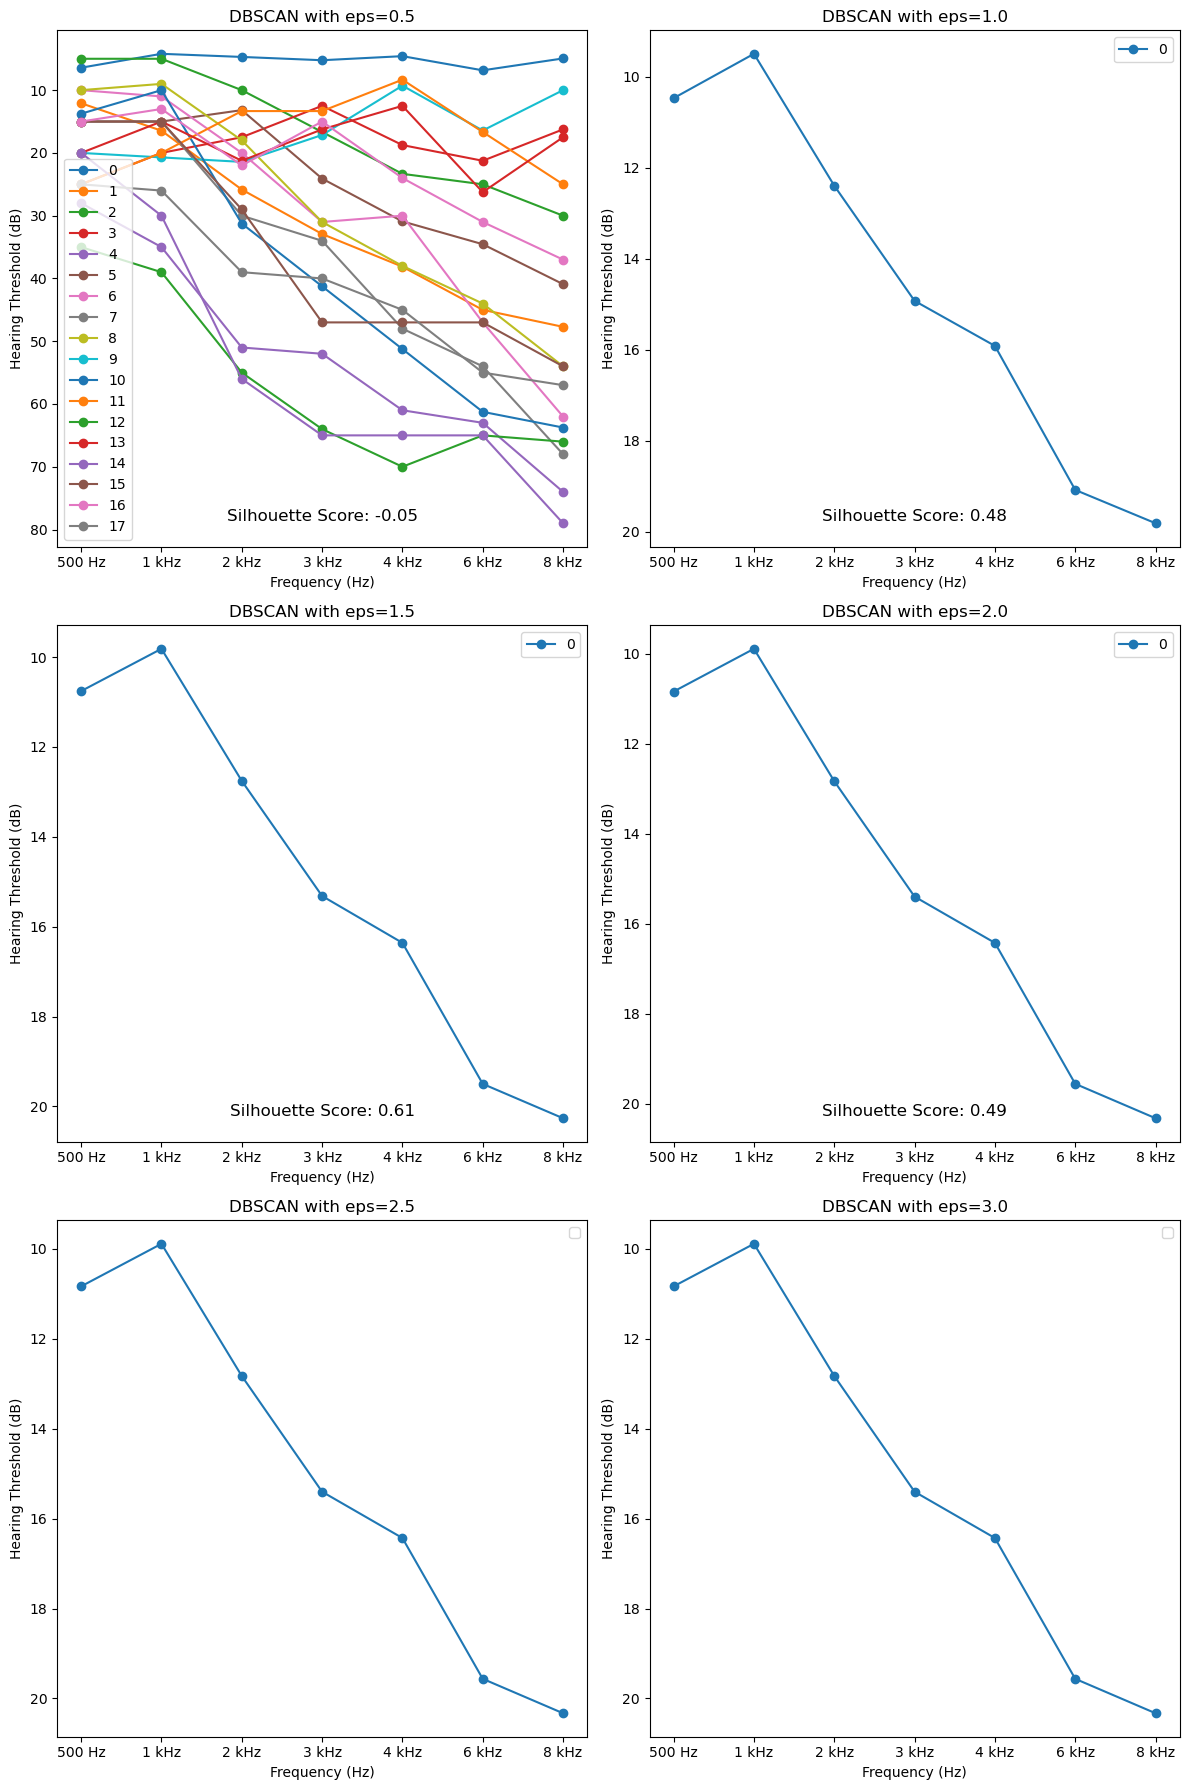

In [7]:
# Fit the DBSCAN algorithm with different eps values

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

eps_values = [0.5, 1.0, 1.5, 2.0]

for idx, eps in enumerate(eps_values):
    # Initialize the DBSCAN object
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(scaled_data)

    # Extract the centroids
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        if label != -1:  # Ignore noise points
            cluster_data = cleaned_ear_data[labels == label]
            centroids.append(cluster_data.mean().values)
    centroids = np.array(centroids)
    centroids_df = pd.DataFrame(centroids, columns=cleaned_ear_data.columns)

    # Plot the line plot
    row = idx // 2
    col = idx % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'DBSCAN with eps={eps}')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(len(unique_labels) - 1))  # Exclude noise label

    # Annotate the Silhouette Score
    if len(unique_labels) > 1:
        score = silhouette_score(scaled_data, labels)
        ax[row, col].annotate(f'Silhouette Score: {score:.2f}', 
                              xy=(0.5, 0.05), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# DBSCAN with Percentile Data

In [10]:
# Replace original values with percentiles

ranked_ear_data = cleaned_ear_data.rank(method='average', pct=True)
ranked_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
0,0.323515,0.173779,0.585033,0.353726,0.557591,0.295065,0.618643
1,0.741881,0.639350,0.585033,0.353726,0.187185,0.605111,0.084340
2,0.843844,0.886078,0.380413,0.353726,0.557591,0.470418,0.516176
3,0.323515,0.173779,0.163960,0.353726,0.187185,0.470418,0.618643
4,0.323515,0.173779,0.585033,0.541289,0.668744,0.295065,0.213054
...,...,...,...,...,...,...,...
7939,0.981558,0.982880,0.950843,0.908925,0.879028,0.825277,0.967900
7940,0.113922,0.639350,0.585033,0.353726,0.187185,0.605111,0.213054
7941,0.843844,0.639350,0.380413,0.353726,0.380979,0.470418,0.371538
7942,0.957515,0.917485,0.711103,0.811619,0.759378,0.870909,0.847306


In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ranked_ear_data)

scaled_data

array([[-0.62288046, -1.15186251,  0.29838071, ...,  0.20120815,
        -0.71547202,  0.41324024],
       [ 0.85315748,  0.49171908,  0.29838071, ..., -1.094317  ,
         0.36663273, -1.44875361],
       [ 1.21289593,  1.36272623, -0.42016425, ...,  0.20120815,
        -0.10346556,  0.05615154],
       ...,
       [ 1.21289593,  0.49171908, -0.42016425, ..., -0.41650528,
        -0.10346556, -0.44789627],
       [ 1.61393769,  1.47360188,  0.74108928, ...,  0.90697768,
         1.294308  ,  1.21010956],
       [-0.62288046,  0.94144318,  0.74108928, ...,  1.32546422,
         1.38986536,  1.53736776]])

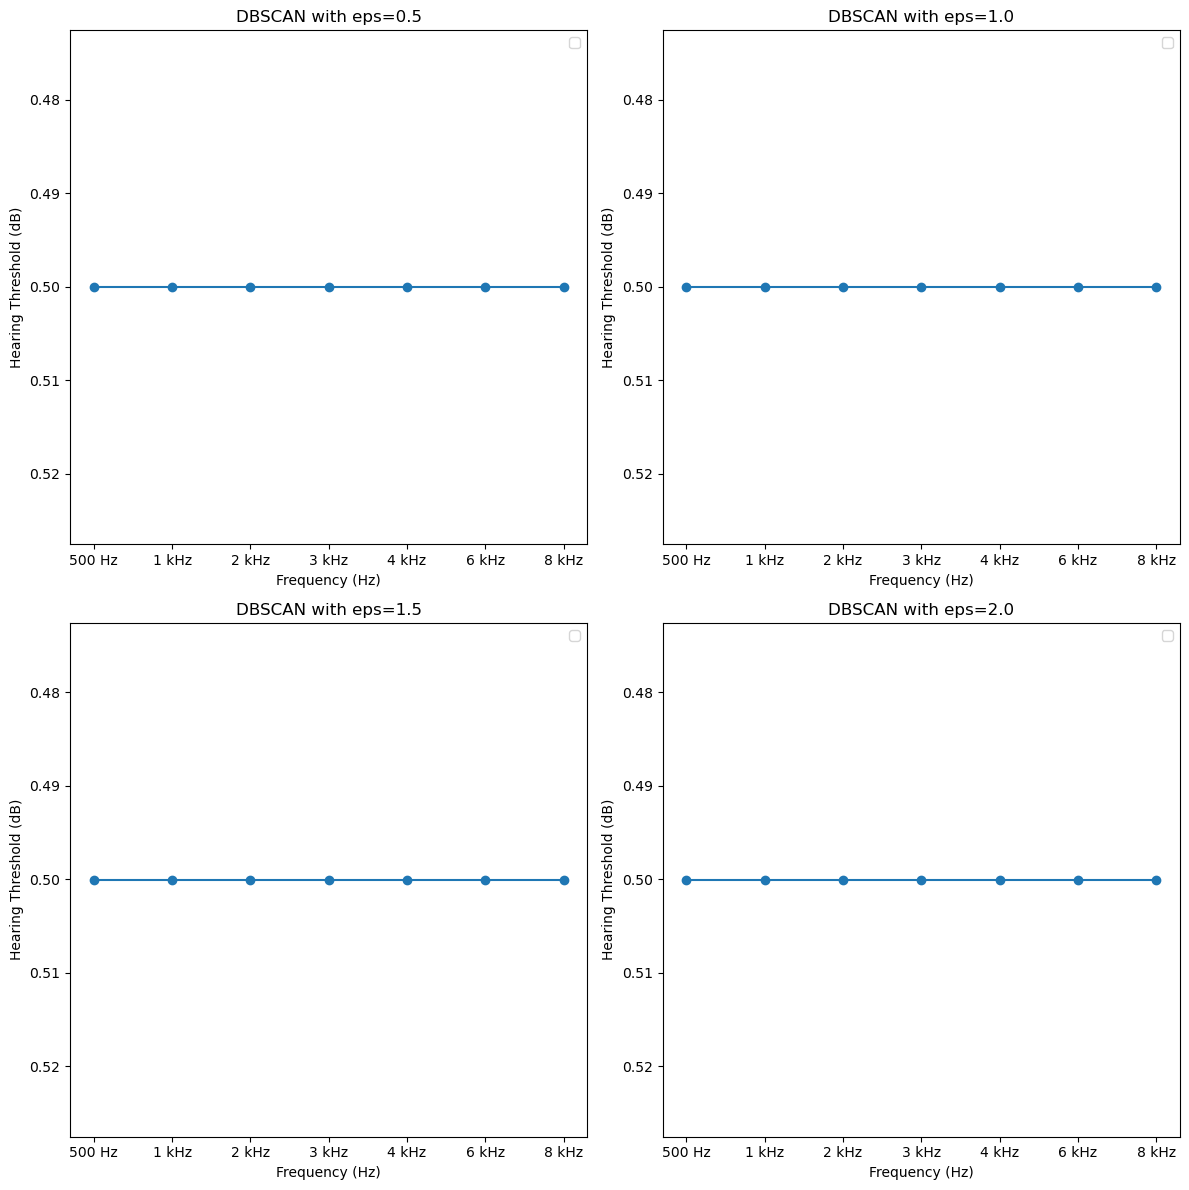

In [12]:
# Fit the DBSCAN algorithm with different eps values

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

eps_values = [0.5, 1.0, 1.5, 2.0]

for idx, eps in enumerate(eps_values):
    # Initialize the DBSCAN object
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(ranked_ear_data)

    # Extract the centroids
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        if label != -1:  # Ignore noise points
            cluster_data = ranked_ear_data[labels == label]
            centroids.append(cluster_data.mean().values)
    centroids = np.array(centroids)
    centroids_df = pd.DataFrame(centroids, columns=ranked_ear_data.columns)

    # Plot the line plot
    row = idx // 2
    col = idx % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'DBSCAN with eps={eps}')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(len(unique_labels) - 1))  # Exclude noise label

    # Annotate the Silhouette Score
    if len(unique_labels) > 1:
        score = silhouette_score(ranked_ear_data, labels)
        ax[row, col].annotate(f'Silhouette Score: {score:.2f}', 
                              xy=(0.5, 0.05), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()